In [2]:

# importing the required libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn import svm

# we will define the ada boosting class-------------------------------------------------------------------------------------------------------------------------
class Ada_Boosting:
    
    
        
    
    # constructor of the adaboosting class with just one argument (number of classifiesr)
    def __init__(self, number_of_classfiers):
        
        self.number_of_classfiers = number_of_classfiers
        
    # defining the fit method- (the method takes in train data and the target variable as arguments)
    def fit(self, traindata, targetvariable):
        
        
        numberOfSamples =  traindata.shape[0]
        numberOffeatures = traindata.shape[1]
        
        self.classifiers = []  # empty lists for saving the classifier objects and alpha values
        self.alphas = []
        
        w_weights = np.ones(numberOfSamples) / numberOfSamples # initializing the weights to 1/numberOfSamples
        
        #looping through the classifiers
        
        i =0
        while i <= self.number_of_classfiers:
            
            
            
            tree = DecisionTreeClassifier(max_depth =1)
            tree.fit(traindata,targetvariable,sample_weight = w_weights)
            predictions = tree.predict(traindata)
            
            # calculating the error and alpha values
            
            error = w_weights.dot( predictions != targetvariable )
            alpha = 0.5*(np.log(((1-error)+ (1e-10))/(error + (1e-10)))) 
                
            
            #updating the weights and normalizing
            w_weights = w_weights * np.exp(-1*alpha*targetvariable*predictions)
            
            w_weights = w_weights/w_weights.sum()
            
            # saving the classifier and alpha 
            
            self.classifiers.append(tree)
            self.alphas.append(alpha)
            
            i = i+1
                                 
            
# defining the predict method of the adaboost class

    def predict(self,traindata):
        
        numberOfSamples =  traindata.shape[0]
        numberOffeatures = traindata.shape[1]
        
        HX = np.zeros(numberOfSamples)
        
        for alpha, tree in zip(self.alphas, self.classifiers):
            HX+= alpha*tree.predict(traindata)
        return np.sign(HX)
    
    def loss(self,traindata, y):
        
        numberOfSamples =  traindata.shape[0]
        numberOffeatures = traindata.shape[1]
        
        HX = np.zeros(numberOfSamples)
        
        for alpha, tree in zip(self.alphas, self.classifiers):
            HX+= alpha*tree.predict(traindata)
        
        L = np.exp(-y*HX).mean()
        
        return L 


Intial train error: 0.09030100334448166
Intial test error: 0.07407407407407407

The train error becomes Zero at : 21
At the point when train error is Zero, the test error: 0.022222222222222254

Final train error: 0.0
Final test error: 0.011111111111111072 Test accuracy : 98.88888888888889


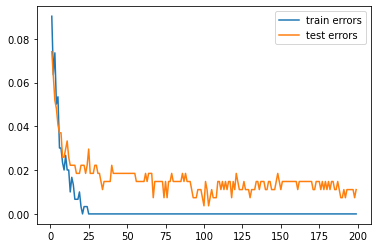

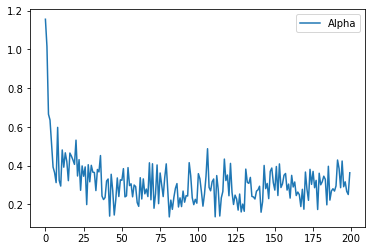

In [4]:
if __name__ == '__main__':  
    
   # importing the data and getting it ready (breast cancer dataset)
    train = pd.read_csv("C://Users//vivek//Desktop//bigdata//wdbc_data.csv", header = None)
    y_tr = train[1]
    x_tr = train.drop([0,1], axis =1)
    x_tr.shape 
    x = np.array(x_tr.iloc[:,:])
    y = np.array(y_tr)
    y[y == 'B'] = 1 
    y[y == 'M'] = -1 
    y=y.astype('int')a
    
    
    from sklearn.model_selection import train_test_split

    X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.472759227 )
    

    numberofmodels  = 200
    
    trainingerrors = np.empty(numberofmodels)
    
    testingerrors = np.empty(numberofmodels)
    
    testlosses = np.empty(numberofmodels)
    
        
    qq = 0
        
    for model in range(numberofmodels):
        
        if model == 0:
            
            trainingerrors[model] = None
            testingerrors[model] = None
            
            continue

        #if model %50 ==0:
         #   print(model)
            
        basemodel = Ada_Boosting(model)
        basemodel.fit(X_train, Y_train)
        
        Predictions= basemodel.predict(X_test)        
        accuracy = np.mean( Predictions ==Y_test)
        
        trainingPredictions =  basemodel.predict(X_train)
        trainingaccuracy = np.mean( trainingPredictions ==Y_train)
        
        trainingerrors[model] = 1 - trainingaccuracy
        testingerrors[model] = 1 - accuracy
        testlosses[model] = basemodel.loss(X_test, Y_test )
        
                
        if model  == 1:
            
            print("Intial train error:", 1 - trainingaccuracy)
            print("Intial test error:", 1 - accuracy)
            print()
            
            
        if (trainingaccuracy ==1) and (qq ==0):    
                
            print("The train error becomes Zero at :", model)
            print("At the point when train error is Zero, the test error:", 1 - accuracy)
            print()                
            qq = 1 
            
        if model == numberofmodels - 1:
            
            print("Final train error:", 1 - trainingaccuracy)
            print("Final test error:", 1 - accuracy, "Test accuracy :", accuracy*100 )
                
    
    plt.plot(trainingerrors, label='train errors')
    plt.plot(testingerrors, label='test errors')
    plt.legend()
    plt.show()
    
    plt.plot(basemodel.alphas, label='Alpha')
    plt.legend()
    plt.show()
    
    #plt.plot(testingerrors, label='test errors')
    #plt.plot(testlosses, label='test losses')
    #plt.legend()
    #plt.show()


In [5]:
# comparision with SVM

from sklearn import svm
svmmodel = svm.SVC(kernel ='linear', gamma = 'auto', C =  1)
svmmodel.fit(X_train, Y_train)


y_predicticted = svmmodel.predict(X_test)
svmaccuracy = np.mean( y_predicticted ==Y_test)
print()
print("SVM Comparision: ")

print("SVM accuracy : ", svmaccuracy*100,"Adaboost accuracy : ",accuracy*100)




SVM Comparision: 
SVM accuracy :  97.77777777777777 Adaboost accuracy :  98.88888888888889



Sklearn Adaboost Comparision: 
Number of estimators:  100 Accuracy:  0.9703703703703703
Number of estimators:  200 Accuracy:  0.9777777777777777
Number of estimators:  300 Accuracy:  0.9814814814814815
Number of estimators:  400 Accuracy:  0.9777777777777777
Number of estimators:  500 Accuracy:  0.9703703703703703
Number of estimators:  600 Accuracy:  0.9814814814814815
Number of estimators:  700 Accuracy:  0.9777777777777777
Number of estimators:  800 Accuracy:  0.9814814814814815
Number of estimators:  900 Accuracy:  0.9814814814814815
Number of estimators:  1000 Accuracy:  0.9777777777777777
Number of estimators:  1100 Accuracy:  0.9777777777777777
Number of estimators:  1200 Accuracy:  0.9777777777777777
Number of estimators:  1300 Accuracy:  0.9777777777777777
Number of estimators:  1400 Accuracy:  0.9740740740740741
Number of estimators:  1500 Accuracy:  0.9703703703703703


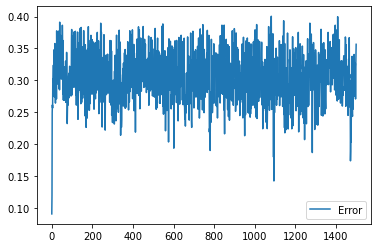

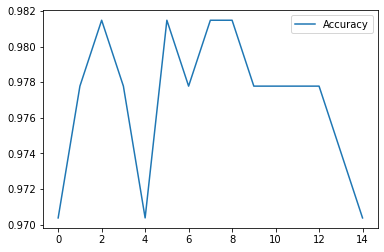

In [6]:
#comparision with AdaBoost Inbuilt

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

l1 = []
print()
print("Sklearn Adaboost Comparision: ")

num_estimators = np.array([100, 200, 300, 400, 500, 600, 700,800,900,1000, 1100, 1200,1300,1400,1500])

for num_estimator in num_estimators:
    
    Adamodel = AdaBoostClassifier(n_estimators=num_estimator, learning_rate=1)

    estimator = Adamodel.fit(X_train, Y_train)


    Y_pred= estimator.predict(X_test)
    
    print("Number of estimators: ",num_estimator, "Accuracy: " , metrics.accuracy_score(Y_pred, Y_test))
    l1.append(metrics.accuracy_score(Y_pred, Y_test))
   
#estimator.predict(X_test) 

plt.plot(estimator.estimator_errors_ , label='Error')
plt.legend()
plt.show()
    
plt.plot(l1 , label='Accuracy')
plt.legend()
plt.show()



# MULTI CLASS CLASSIFICATION


In [7]:
#using the MNIST DATASET

train_m = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//mnist_train.csv", header = None)
test_m = pd.read_csv("C://Users//vivek//Desktop//bigdata//MAchine learning//mnist_test.csv", header = None)

y_tr_m = train_m[0]
x_tr_m = train_m.drop([0], axis =1)
x_tr_m.shape 
x_m = np.array(x_tr_m.iloc[:,:])
y_m = np.array(y_tr_m)
y_m=y_m.astype('int')

y_te_m = test_m[0]
x_te_m = test_m.drop([0], axis =1)
x_test_m = np.array(x_te_m.iloc[:,:])
y_test_m = np.array(y_te_m)

#------x_m, y_m are the train datasets x_test_m and y_test_m are the test datasets 

Intial train error: 0.8881666666666667
Intial test error: 0.887

Final train error: 0.8881666666666667
Final test error: 0.887 Test accuracy : 11.3


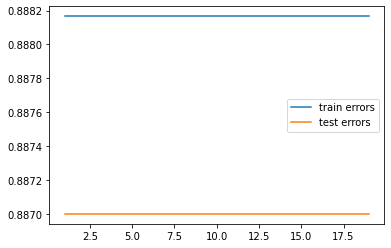

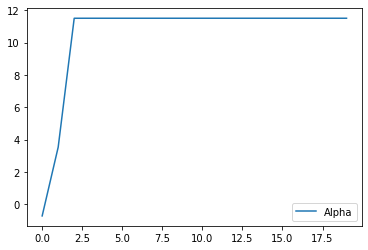

In [8]:
numberofmodels_m  = 20
trainingerrors_m = np.empty(numberofmodels_m)
    
testingerrors_m = np.empty(numberofmodels_m)
    
testlosses_m = np.empty(numberofmodels_m)
    
        
qq = 0
        
for model in range(numberofmodels_m):
        
    if model == 0:
            
        trainingerrors_m[model] = None
        testingerrors_m[model] = None
            
        continue

        #if model %50 ==0:
         #   print(model)
            
    basemodel1 = Ada_Boosting(model)
    basemodel1.fit(x_m, y_m)
        
    Predictions1= basemodel1.predict(x_test_m)        
    accuracy1 = np.mean( Predictions1 ==y_test_m)
        
    trainingPredictions_m =  basemodel1.predict(x_m)
    trainingaccuracy_m = np.mean( trainingPredictions_m ==y_m)
        
    trainingerrors_m[model] = 1 - trainingaccuracy_m
    testingerrors_m[model] = 1 - accuracy1
    testlosses_m[model] = basemodel1.loss(x_test_m, y_test_m )
        
                
    if model  == 1:
            
        print("Intial train error:", 1 - trainingaccuracy_m)
        print("Intial test error:", 1 - accuracy1)
        print()
            
            
    if (trainingaccuracy_m ==1) and (qq ==0):    
                
        print("The train error becomes Zero at :", model)
        print("At the point when train error is Zero, the test error:", 1 - accuracy1)
        print()                
        qq = 1 
            
    if model == numberofmodels_m - 1:
            
        print("Final train error:", 1 - trainingaccuracy_m)
        print("Final test error:", 1 - accuracy1, "Test accuracy :", accuracy1*100 )
                
    
plt.plot(trainingerrors_m, label='train errors')
plt.plot(testingerrors_m, label='test errors')
plt.legend()
plt.show()
    
plt.plot(basemodel1.alphas, label='Alpha')
plt.legend()
plt.show()
    



Sklearn Adaboost Comparision: 
Number of estimators:  10 Accuracy:  0.534
Number of estimators:  20 Accuracy:  0.607
Number of estimators:  30 Accuracy:  0.562
Number of estimators:  50 Accuracy:  0.573
Number of estimators:  100 Accuracy:  0.494


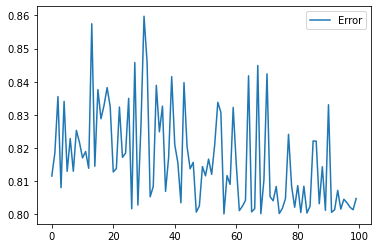

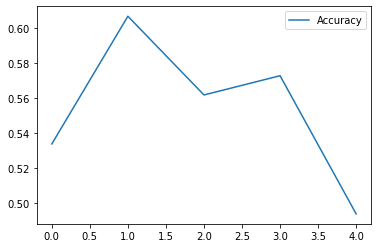

In [13]:
l2 = []
print()
print("Sklearn Adaboost Comparision: ")

num_estimators_m1 = np.array([10, 20, 30,50,100])

for num_estimator in num_estimators_m1:
    
    Adamodel1 = AdaBoostClassifier(n_estimators=num_estimator, learning_rate=1)

    estimator1 = Adamodel1.fit(x_m, y_m)


    Y_pred1= estimator1.predict(x_test_m)
    
    print("Number of estimators: ",num_estimator, "Accuracy: " , metrics.accuracy_score(Y_pred1, y_test_m))
    l2.append(metrics.accuracy_score(Y_pred1, y_test_m))
   
#estimator.predict(X_test) 

plt.plot(estimator1.estimator_errors_ , label='Error')
plt.legend()
plt.show()
    
plt.plot(l2 , label='Accuracy')
plt.legend()
plt.show()


# IMPACT OF STANDARDIZATION & NORMALIZATION

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train )
X_train1= scaler.transform(X_train)

scaler.fit(X_test )
X_test1= scaler.transform(X_test)


Intial train error: 0.09030100334448166
Intial test error: 0.062962962962963

The train error becomes Zero at : 21
At the point when train error is Zero, the test error: 0.0444444444444444

Final train error: 0.0
Final test error: 0.0444444444444444 Test accuracy : 95.55555555555556


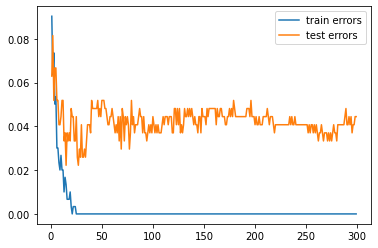

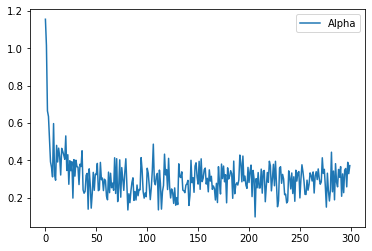

In [18]:
numberofmodels  = 300
    
trainingerrors = np.empty(numberofmodels)
    
testingerrors = np.empty(numberofmodels)
    
testlosses = np.empty(numberofmodels)
    
        
qq = 0
        
for model in range(numberofmodels):
        
    if model == 0:
            
        trainingerrors[model] = None
        testingerrors[model] = None
            
        continue

        #if model %50 ==0:
         #   print(model)
            
    basemodel2 = Ada_Boosting(model)
    basemodel2.fit(X_train1, Y_train)
        
    Predictions2= basemodel2.predict(X_test1)        
    accuracy2 = np.mean( Predictions2 ==Y_test)
        
    trainingPredictions2 =  basemodel2.predict(X_train1)
    trainingaccuracy2 = np.mean( trainingPredictions2 ==Y_train)
        
    trainingerrors[model] = 1 - trainingaccuracy2
    testingerrors[model] = 1 - accuracy2
    testlosses[model] = basemodel2.loss(X_test1, Y_test )
        
                
    if model  == 1:
            
        print("Intial train error:", 1 - trainingaccuracy2)
        print("Intial test error:", 1 - accuracy2)
        print()
            
            
    if (trainingaccuracy2 ==1) and (qq ==0):    
                
        print("The train error becomes Zero at :", model)
        print("At the point when train error is Zero, the test error:", 1 - accuracy2)
        print()                
        qq = 1 
            
    if model == numberofmodels - 1:
            
        print("Final train error:", 1 - trainingaccuracy2)
        print("Final test error:", 1 - accuracy2, "Test accuracy :", accuracy2*100 )
                
    
plt.plot(trainingerrors, label='train errors')
plt.plot(testingerrors, label='test errors')
plt.legend()
plt.show()
    
plt.plot(basemodel2.alphas, label='Alpha')
plt.legend()
plt.show()
    
